In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Generate sample data
np.random.seed(42)
time = np.arange(0, 365 * 3)
trend = 0.05 * time
seasonality = 10 * np.sin(2 * np.pi * time / 365)
noise = np.random.normal(0, 3, len(time))

# data sinuidal
seasonality

array([ 0.        ,  0.17213356,  0.34421612, ..., -0.51619667,
       -0.34421612, -0.17213356])

In [4]:
# generate timeseries 
timeseries_data = trend + seasonality + noise

In [5]:
# convert data to pandas
time_df = pd.date_range('2020-08-01', periods=len(time), freq='D')
timeseries_df = pd.Series(timeseries_data, index=time_df)
display(timeseries_df.head())

2020-08-01    1.490142
2020-08-02   -0.192659
2020-08-03    2.387282
2020-08-04    5.235286
2020-08-05    0.185564
Freq: D, dtype: float64

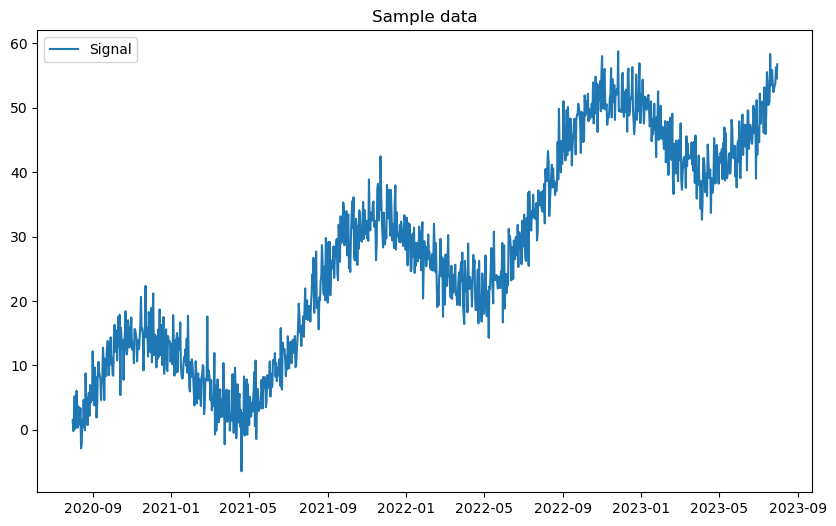

In [6]:
# plot sample data
plt.figure(figsize=(10, 6))
plt.plot(time_df,  timeseries_df, label='Signal')
plt.legend()
plt.title('Sample data')
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(timeseries_df, order=(1, 0, 0))
ar_model_result = ar_model.fit()

In [8]:
# predict from ar_model
forecast = ar_model_result.predict(start=len(time), end=len(time) + 51 * 7, dynamic=True)

timeseries_df.tail()

2023-07-27    53.425548
2023-07-28    53.750309
2023-07-29    56.266692
2023-07-30    54.461622
2023-07-31    56.725787
Freq: D, dtype: float64

In [9]:
forecast.index = pd.date_range(start= timeseries_df.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='D')
forecast.tail()

2024-07-19    27.451798
2024-07-20    27.451790
2024-07-21    27.451783
2024-07-22    27.451775
2024-07-23    27.451768
Freq: D, Name: predicted_mean, dtype: float64

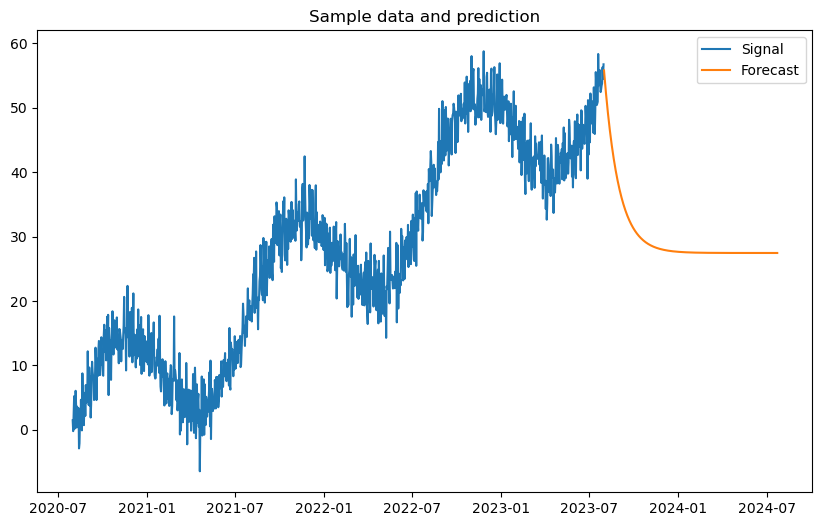

In [10]:
# plot sample data and prediction
fig, axis = plt.subplots(figsize=(10, 6))
axis.plot(time_df, timeseries_df, label='Signal')
axis.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.title('Sample data and prediction')
plt.show()

In [12]:
# moving average using arima
from statsmodels.tsa.arima.model import ARIMA

ma_model = ARIMA(timeseries_df, order=(0, 0, 2))
ma_model_result = ma_model.fit()

In [13]:
forecast = ar_model_result.predict(start=len(time), end=len(time) + 51 * 7, dynamic=True)
forecast.index = pd.date_range(start= timeseries_df.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='D')
forecast.tail()

2024-07-19    27.450111
2024-07-20    27.450111
2024-07-21    27.450111
2024-07-22    27.450111
2024-07-23    27.450111
Freq: D, Name: predicted_mean, dtype: float64

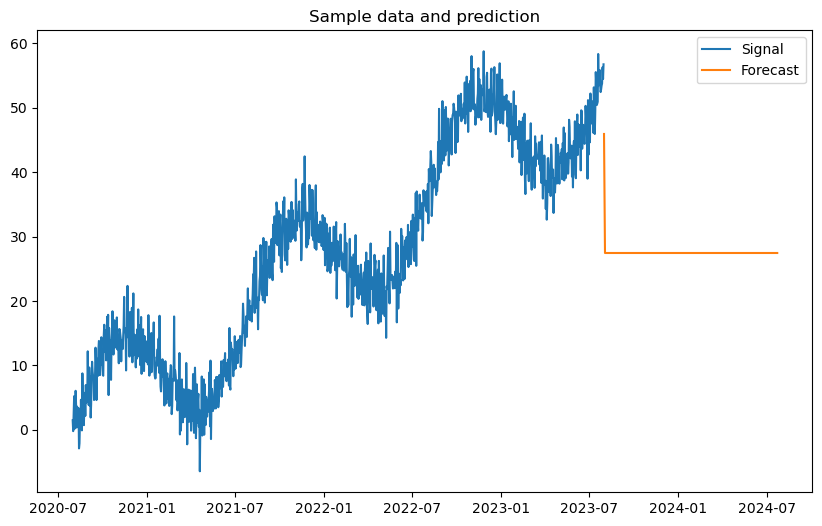

In [14]:
# plot sample data and prediction
fig, axis = plt.subplots(figsize=(10, 6))
axis.plot(time_df, timeseries_df, label='Signal')
axis.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.title('Sample data and prediction')
plt.show()

In [15]:
# ARMA auto regression moving average
arma_model = ARIMA(timeseries_df, order=(1, 0, 1))
arma_model_result = arma_model.fit()

/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [16]:
predict = arma_model_result.predict(start=len(time), end=len(time) + 51 * 7, dynamic=True)
predict.index = pd.date_range(start= timeseries_df.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='D')
predict.tail()

2024-07-19    51.767889
2024-07-20    51.760813
2024-07-21    51.753739
2024-07-22    51.746668
2024-07-23    51.739598
Freq: D, Name: predicted_mean, dtype: float64

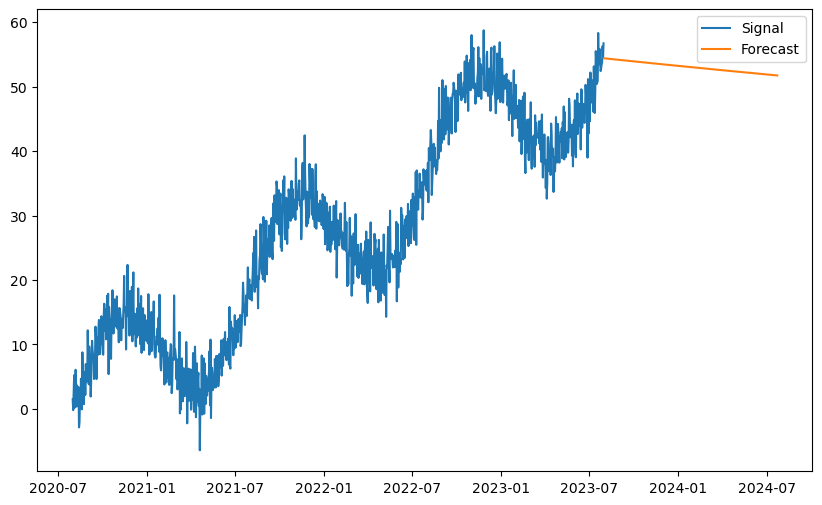

In [17]:
# plot arma model
fig, axis = plt.subplots(figsize=(10, 6))
axis.plot(time_df, timeseries_df, label='Signal')
axis.plot(predict.index, predict, label='Forecast')
plt.legend()
plt.show()

In [19]:
# checking data stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(timeseries_df)
print(result[0], result[1])

-0.4503719324416545 0.9013426989614444


In [20]:
# generate stationary data
np.random.seed(42)
n = 1000
phi = 0.6
ar_series = [np.random.normal(0, 1)]
for _ in range(1, n):
    ar_series.append(phi * ar_series[-1] + np.random.normal(0, 1))
# Convert to pandas Series
time_series = pd.Series(ar_series, index=pd.date_range(start="2020-01-01", periods=n, freq="D"))

In [21]:
result = adfuller(time_series)
print(result[0], result[1])

-15.930713855895824 7.735269792207467e-29


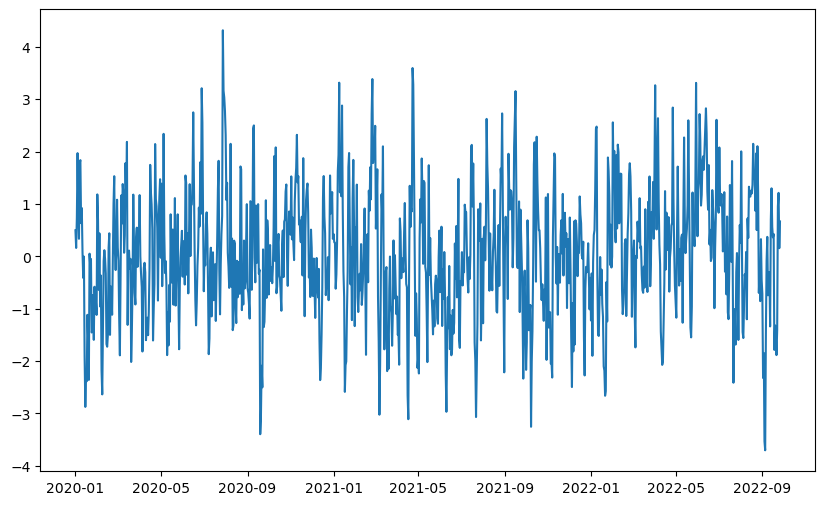

In [22]:
# plot time_series
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.show()

In [23]:
# test model using aic
from statsmodels.tsa.arima.model import ARIMA

p_value = range(5)
d_value = range(2) 
q_value = range(5)

best_aic = np.inf
best_order = None
best_model = None

for p in p_value:
    for d in d_value:
        for q in q_value:
            try:
                model = ARIMA(time_series, order=(p, d, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                pass


/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/hubble/anaconda3/envs/py_data/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting para

In [24]:
print(f"Best AIC: {best_aic}")
print(f"Best Order: {best_order}")


Best AIC: 2801.1500615790364
Best Order: (1, 0, 0)


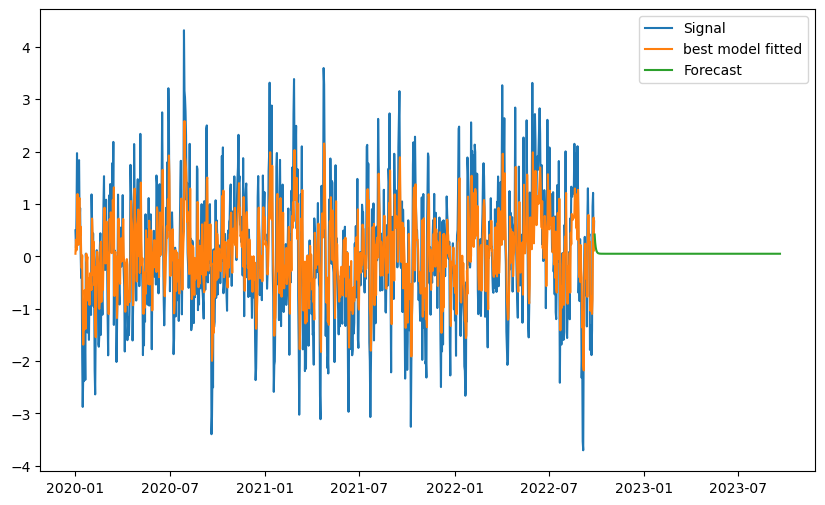

In [28]:
predict = best_model.predict(start=len(time_series), end=len(time_series) + 51 * 7, dynamic=True)
predict.index = pd.date_range(start= time_series.index[-1] + pd.Timedelta(days=1), periods=len(predict), freq='D')

# plot predict
fig, axis = plt.subplots(figsize=(10, 6))
axis.plot(time_series.index, time_series, label='Signal')
axis.plot(time_series.index, best_model.fittedvalues, label='best model fitted')
axis.plot(predict.index, predict, label='Forecast')
plt.legend()
plt.show()